# Ride Sharing Data Analytics 
**Tejas Pant** <br>
**11/05/2018**

### Tasks
1) Identificantion of driver lifetime value <br>
2) Determine factors affecting driver's lifetime <br>
3) Identification of indicators leading to driver churn


In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading excel sheets
df_drivers = pd.read_excel(open('Ride_share_data.xlsx', 'rb'), sheet_name='Driver ID')
df_rides = pd.read_excel(open('Ride_share_data.xlsx', 'rb'), sheet_name='Rider ID')
df_ride_timestamp = pd.read_excel(open('Ride_share_data.xlsx', 'rb'), sheet_name='Ride Timestamp')

## Checking and correcting data types for each field of the table 

### Drivers ID

In [4]:
#checking data types of the dataframes
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
driver_id              937 non-null object
driver_onboard_date    937 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 14.7+ KB


In [5]:
#The driver_on_board_date is a string- this needs to be converted to the date time format 
df_drivers['driver_onboard_date'] = pd.to_datetime(df_drivers['driver_onboard_date'])

In [6]:
#checking the data types of the df_drivers table again
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
driver_id              937 non-null object
driver_onboard_date    937 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 14.7+ KB


### Riders ID

In [7]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
driver_id          193502 non-null object
ride_id            193502 non-null object
ride_distance      193502 non-null int64
ride_duration      193502 non-null int64
ride_prime_time    193502 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


### Riders timestamp 

In [8]:
df_ride_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
ride_id      970405 non-null object
event        970405 non-null object
timestamp    970404 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 22.2+ MB


In [9]:
df_ride_timestamp['timestamp'] = pd.to_datetime(df_ride_timestamp['timestamp'])

### Pivoting the table to better represent the different times for each event of the ride ID

In [10]:
df_ride_timestamp = df_ride_timestamp.pivot(index='ride_id', columns='event', values='timestamp')

In [11]:
df_ride_timestamp.head(2)

event,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
ride_id,,,,,
00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21


In [12]:
#checking data types
df_ride_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194081 entries, 00003037a262d9ee40e61b5c0718f7f0 to ffffccd77f47a3de26dfed9a851464b4
Data columns (total 5 columns):
accepted_at       194081 non-null datetime64[ns]
arrived_at        194080 non-null datetime64[ns]
dropped_off_at    194081 non-null datetime64[ns]
picked_up_at      194081 non-null datetime64[ns]
requested_at      194081 non-null datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 8.9+ MB


# Extracting useful information from the columns of every dataframe

### Drivers ID

In [13]:
df_drivers['driver_onboard_week'] = df_drivers['driver_onboard_date'].dt.weekofyear
df_drivers['driver_onboard_month'] = df_drivers['driver_onboard_date'].dt.month
df_drivers['driver_onboard_day'] = df_drivers['driver_onboard_date'].dt.dayofyear

### Rides ID

In [14]:
df_ride_timestamp['day_of_year'] = df_ride_timestamp['accepted_at'].dt.dayofyear
df_ride_timestamp['month'] = df_ride_timestamp['accepted_at'].dt.month
df_ride_timestamp['accepted_time'] = (df_ride_timestamp['accepted_at'] - df_ride_timestamp['requested_at']).astype('timedelta64[s]')
df_ride_timestamp['hour_of_day'] = df_ride_timestamp['accepted_at'].dt.hour
df_ride_timestamp['week_of_year'] = df_ride_timestamp['accepted_at'].dt.weekofyear
df_ride_timestamp['day_of_week'] = df_ride_timestamp['accepted_at'].dt.weekday

In [15]:
df_ride_timestamp.head()

event,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,day_of_year,month,accepted_time,hour_of_day,week_of_year,day_of_week
ride_id,,,,,,,,,,,
00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19,165,6,32.0,9,24,0
00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21,135,5,4.0,5,19,5
000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09,137,5,5.0,15,20,0
00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:40:47,2016-05-11 19:35:15,2016-05-11 19:29:36,132,5,7.0,19,19,2
0000d9b24d8ccdd991b76258e616fa01,2016-04-26 18:12:15,2016-04-26 18:16:52,2016-04-26 18:24:14,2016-04-26 18:16:55,2016-04-26 18:11:38,117,4,37.0,18,17,1


# Merging the three dataframes 

In [16]:
# Merging rides dataframe with ride_timestamp dataframe 
df_merged_rides = pd.merge(df_rides, df_ride_timestamp, on='ride_id', how='inner')

In [17]:
df_merged_rides.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,day_of_year,month,accepted_time,hour_of_day,week_of_year,day_of_week
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,114,4,25.0,2,16,5
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,89,3,3.0,19,13,1
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,173,6,8.0,11,25,1
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29,140,5,4.0,9,20,3
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,111,4,2.0,22,16,2


In [18]:
# Merging this merged data frame with the drivers dataframe 
df_merged = pd.merge(df_merged_rides, df_drivers, on='driver_id', how='inner')

In [19]:
df_merged.head(5)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,day_of_year,month,accepted_time,hour_of_day,week_of_year,day_of_week,driver_onboard_date,driver_onboard_week,driver_onboard_month,driver_onboard_day
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,114,4,25.0,2,16,5,2016-03-29,13,3,89
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,89,3,3.0,19,13,1,2016-03-29,13,3,89
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,173,6,8.0,11,25,1,2016-03-29,13,3,89
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29,140,5,4.0,9,20,3,2016-03-29,13,3,89
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,111,4,2.0,22,16,2,2016-03-29,13,3,89


In [20]:
df_merged.describe()

,ride_distance,ride_duration,ride_prime_time,day_of_year,month,accepted_time,hour_of_day,week_of_year,day_of_week,driver_onboard_week,driver_onboard_month,driver_onboard_day
count,184209.000000,184209.000000,184209.000000,184209.000000,184209.000000,184209.000000,184209.000000,184209.000000,184209.000000,184209.000000,184209.000000,184209.000000
mean,6945.197042,859.872292,17.373880,141.802610,5.150378,11.660608,14.173759,20.236737,3.145454,15.636228,4.102574,108.995326
std,8938.015943,572.846146,30.833558,22.271292,0.754533,36.515336,6.323163,3.179712,1.894497,1.931197,0.593697,13.777011
min,-2.000000,2.000000,0.000000,88.000000,3.000000,0.000000,0.000000,13.000000,0.000000,13.000000,3.000000,88.000000
25%,2457.000000,492.000000,0.000000,126.000000,5.000000,5.000000,10.000000,18.000000,2.000000,14.000000,4.000000,97.000000
50%,4007.000000,727.000000,0.000000,142.000000,5.000000,6.000000,15.000000,20.000000,3.000000,15.000000,4.000000,108.000000
75%,7169.000000,1070.000000,25.000000,161.000000,6.000000,9.000000,19.000000,23.000000,5.000000,17.000000,4.000000,120.000000
max,724679.000000,28204.000000,500.000000,178.000000,6.000000,5028.000000,23.000000,25.000000,6.000000,19.000000,5.000000,136.000000


## Exploratory data analysis to see the distribution of factors that may affect the lifetime value of a driver

# Ride distance 

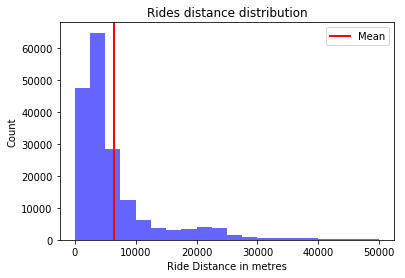

In [21]:
df_merged = df_merged[(df_merged.ride_distance < 50000)]
plt.hist(df_merged['ride_distance'], 20, facecolor='blue', alpha=0.6)
plt.xlabel('Ride Distance in metres')
plt.ylabel('Count')
plt.title('Rides distance distribution')
plt.axvline(df_merged['ride_distance'].mean(), color='red',linewidth=2)
plt.legend(['Mean'])


In [46]:
df_merged.ride_distance.describe()

count    179763.000000
mean       6348.645934
std        6801.749684
min          -2.000000
25%        2435.000000
50%        3947.000000
75%        6922.000000
max       49989.000000
Name: ride_distance, dtype: float64

## Number of prime time rides

In [22]:
df_merged.ride_prime_time.value_counts()

0      118038
25      32009
50      16885
75       7775
100      5954
150      1582
200       408
250        93
300        29
350        13
400        10
500         1
Name: ride_prime_time, dtype: int64

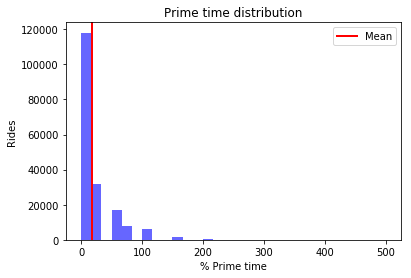

In [23]:
plt.hist(df_merged['ride_prime_time'], 30, facecolor='blue', alpha=0.6)
plt.xlabel('% Prime time')
plt.ylabel('Rides')
plt.title('Prime time distribution')
plt.axvline(df_merged['ride_prime_time'].mean(), color='red',linewidth=2)
plt.legend(['Mean'])

## Ride duration 

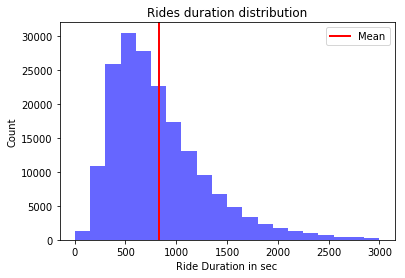

In [24]:
df_merged = df_merged[(df_merged.ride_duration < 3000)]
plt.hist(df_merged['ride_duration'], 20, facecolor='blue', alpha=0.6)
plt.xlabel('Ride Duration in sec')
plt.ylabel('Count')
plt.title('Rides duration distribution')
plt.axvline(df_merged['ride_duration'].mean(), color='red',linewidth=2)
plt.legend(['Mean'])

In [47]:
df_merged.ride_duration.describe()

count    179763.000000
mean        824.601158
std         465.652529
min           2.000000
25%         488.000000
50%         720.000000
75%        1051.000000
max        2999.000000
Name: ride_duration, dtype: float64

# Accepted time

In [48]:
df_merged.accepted_time.describe()

count    179763.00000
mean          9.10387
std           9.36517
min           0.00000
25%           5.00000
50%           6.00000
75%           9.00000
max          79.00000
Name: accepted_time, dtype: float64

Text(0.5,1,'Accepted time distribution')

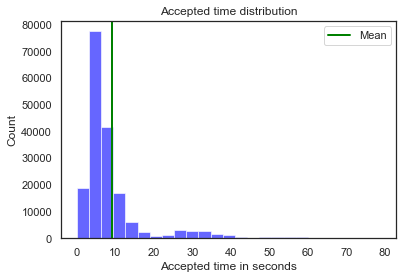

In [49]:
df_merged = df_merged[df_merged.accepted_time < 80]
plt.hist(df_merged['accepted_time'], 25, facecolor='blue', alpha=0.6)
plt.axvline(df_merged['accepted_time'].mean(), color='green',linewidth=2)
plt.legend(['Mean'])
plt.xlabel('Accepted time in seconds')
plt.ylabel('Count')
plt.title('Accepted time distribution')


The above distribution of accepted time shows us that majority of the drivers accept rides within 9 seconds. 

### Driver on boarding distribution

Text(0.5,1,'Driver onboarding day distribution by day of the year')

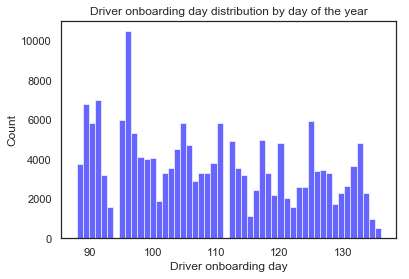

In [50]:
plt.hist(df_merged['driver_onboard_day'], 50, facecolor='blue', alpha=0.6)
plt.xlabel('Driver onboarding day')
plt.ylabel('Count')
plt.title('Driver onboarding day distribution by day of the year')

Driver on boarding distribution by week 

Text(0.5,1,'Driver onboarding distribution by week')

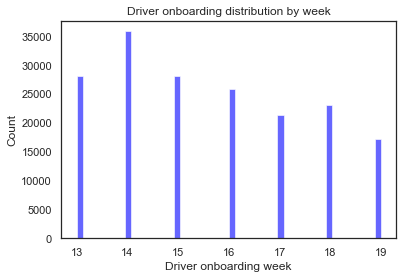

In [51]:
plt.hist(df_merged['driver_onboard_week'], 50, facecolor='blue', alpha=0.6)
plt.xlabel('Driver onboarding week')
plt.ylabel('Count')
plt.title('Driver onboarding distribution by week')

## Calculation of Fare earned for each trip 

In [52]:
Base_fare = 2
Cost_per_minute = 0.22
Cost_per_mile = 1.15
Service_fee = 1.75
Max_fare = 400
Min_fare = 5
Fare = Base_fare + (((Cost_per_mile * df_merged['ride_distance'] * 0.000621371) + 
               (Cost_per_minute * df_merged['ride_duration'] * 0.0166667)) * (1 + df_merged['ride_prime_time']/100)) + Service_fee

df_merged['Fare_Collected'] = Fare

#Clip fare values between Min and Max fare
fare_collected = np.array(df_merged['Fare_Collected'].values.tolist())
fare_collected2 = np.clip(fare_collected, Min_fare, Max_fare)

df_merged['Fare_Collected'] = fare_collected2.tolist()

In [53]:
df_merged.Fare_Collected.describe()

count    179763.000000
mean         12.563477
std           7.668527
min           5.000000
25%           7.815189
50%          10.160394
75%          14.271705
max         142.408529
Name: Fare_Collected, dtype: float64

Text(0.5,1,'Distirbution of Fare Collected')

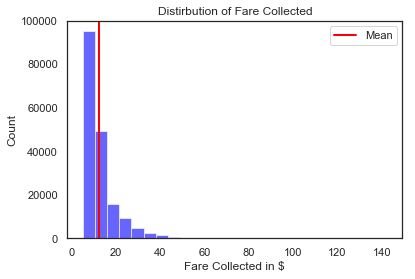

In [54]:
plt.hist(df_merged['Fare_Collected'], 25, facecolor='blue', alpha=0.6)
plt.axvline(df_merged['Fare_Collected'].mean(), color='red',linewidth=2)
#plt.axvline(df_merged['Fare_Collected'].median(), color='red',linewidth=1)
plt.legend(['Mean'])
plt.xlabel('Fare Collected in $')
plt.ylabel('Count')
plt.title('Distirbution of Fare Collected')

# Computing the Lifetime of a Driver

Approach:

In order to find the lifetime of a driver, the last day on which a driver accepted a ride needs to be calculated, after which the following formula is applied to find his lifetime:

Lifetime of driver= (Day on which last ride was accepted by driver)- (Day on which driver onboarded)

Assumption: The last day on which a driver accepts a ride is his last day working at Lyft. 

In [55]:
df_merged.head(5)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,...,month,accepted_time,hour_of_day,week_of_year,day_of_week,driver_onboard_date,driver_onboard_week,driver_onboard_month,driver_onboard_day,Fare_Collected
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,...,4,25.0,2,16,5,2016-03-29,13,3,89,7.489651
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,...,3,3.0,19,13,1,2016-03-29,13,3,89,9.118746
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,...,6,8.0,11,25,1,2016-03-29,13,3,89,8.192578
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,...,4,2.0,22,16,2,2016-03-29,13,3,89,15.666311
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100,2016-06-21 08:29:24,2016-06-21 08:35:33,2016-06-21 08:50:53,2016-06-21 08:35:36,2016-06-21 08:29:17,...,6,7.0,8,25,1,2016-03-29,13,3,89,17.380349


In [56]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179763 entries, 0 to 184208
Data columns (total 21 columns):
driver_id               179763 non-null object
ride_id                 179763 non-null object
ride_distance           179763 non-null int64
ride_duration           179763 non-null int64
ride_prime_time         179763 non-null int64
accepted_at             179763 non-null datetime64[ns]
arrived_at              179762 non-null datetime64[ns]
dropped_off_at          179763 non-null datetime64[ns]
picked_up_at            179763 non-null datetime64[ns]
requested_at            179763 non-null datetime64[ns]
day_of_year             179763 non-null int64
month                   179763 non-null int64
accepted_time           179763 non-null float64
hour_of_day             179763 non-null int64
week_of_year            179763 non-null int64
day_of_week             179763 non-null int64
driver_onboard_date     179763 non-null datetime64[ns]
driver_onboard_week     179763 non-null int64
dri

In [57]:
df_lifetime = df_merged.pivot_table(index='driver_id', values=('day_of_year','driver_onboard_day'), aggfunc=np.max)

In [58]:
df_lifetime.head(5)

,day_of_year,driver_onboard_day
driver_id,,
002be0ffdc997bd5c50703158b7c2491,175,89
007f0389f9c7b03ef97098422f902e62,174,89
011e5c5dfc5c2c92501b8b24d47509bc,164,96
0152a2f305e71d26cc964f8d4411add9,178,114
01674381af7edd264113d4e6ed55ecda,176,120


In [59]:
df_lifetime['days_worked'] = df_lifetime['day_of_year'] - df_lifetime['driver_onboard_day']

In [60]:
df_lifetime.head(5)

,day_of_year,driver_onboard_day,days_worked
driver_id,,,
002be0ffdc997bd5c50703158b7c2491,175,89,86
007f0389f9c7b03ef97098422f902e62,174,89,85
011e5c5dfc5c2c92501b8b24d47509bc,164,96,68
0152a2f305e71d26cc964f8d4411add9,178,114,64
01674381af7edd264113d4e6ed55ecda,176,120,56


Analyzing the distribution for the number of days worked 

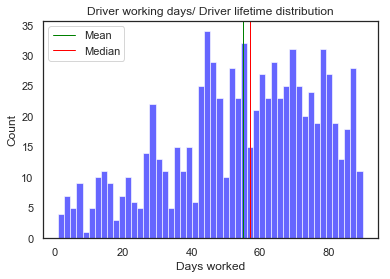

In [61]:
plt.hist(df_lifetime['days_worked'], 50, facecolor='blue', alpha=0.6)
plt.xlabel('Days worked')
plt.ylabel('Count')
plt.title('Driver working days/ Driver lifetime distribution')
plt.axvline(df_lifetime['days_worked'].mean(), color='green',linewidth=1)
plt.axvline(df_lifetime['days_worked'].median(), color='red',linewidth=1)
plt.legend(['Mean','Median'])

In [62]:
df_lifetime.mean()

day_of_year           165.062127
driver_onboard_day    110.014337
days_worked            55.047790
dtype: float64

This shows that the average lifetime of a driver at Lyft is 55 days assuming every driver leaves after the last day on which they accepted a ride. 

## Calculate total number of hours worked during lifetime

In [63]:
time_worked = df_merged.pivot_table(index='driver_id', values=('ride_duration'), aggfunc=np.sum)
df_lifetime['time_worked'] = time_worked / 3600

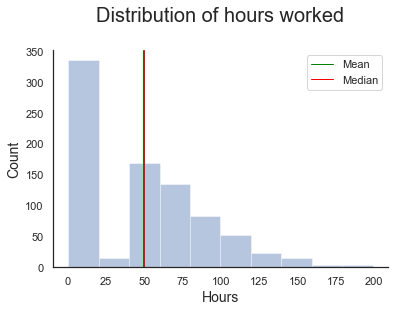

In [80]:
ax = sns.distplot(df_lifetime['time_worked'], hist=True, kde=False, bins=10)
sns.set_context('poster')
sns.set(style='white')
sns.despine(bottom=False)
ax.set_title('Distribution of hours worked\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Hours', size = 14)
ax.axvline(df_lifetime['time_worked'].mean(), color = 'green', linewidth = 1)
ax.axvline(df_lifetime['time_worked'].median(), color = 'red', linewidth = 1)
ax.legend(['Mean', 'Median'])
plt.show()

## Calculate fares collected per hour

In [81]:
# Take the sum of a drivers over their lifetime
fare_collected = df_merged.pivot_table(index='driver_id', values=('Fare_Collected'), aggfunc=np.sum)
df_lifetime['Total_Fare_Collected_Lifetime'] = fare_collected

# Convert to fare per hour
df_lifetime['Total_Fare_Collected_Lifetime_PerHour'] = df_lifetime['Total_Fare_Collected_Lifetime'] / df_lifetime['time_worked']

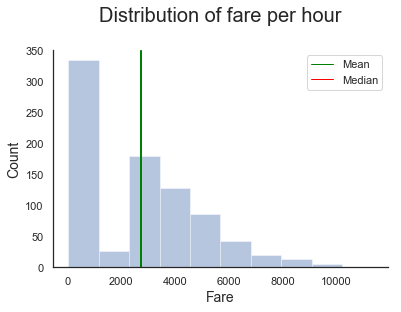

In [82]:
ax = sns.distplot(df_lifetime['Total_Fare_Collected_Lifetime'], hist=True, kde=False, bins=10)
sns.set_context('poster')
sns.set(style='white')
sns.despine(bottom=False)
ax.set_title('Distribution of fare per hour\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Fare', size = 14)
ax.axvline(df_lifetime['Total_Fare_Collected_Lifetime'].mean(), color = 'green', linewidth = 1)
ax.axvline(df_lifetime['Total_Fare_Collected_Lifetime'].median(), color = 'red', linewidth = 1)
ax.legend(['Mean', 'Median'])
plt.show()

In [83]:
df_lifetime.Total_Fare_Collected_Lifetime.describe()

count      837.000000
mean      2698.265529
std       2185.971796
min         25.691317
25%        542.398706
50%       2737.498605
75%       4082.547460
max      11347.047862
Name: Total_Fare_Collected_Lifetime, dtype: float64

## Calculate number of rides

In [84]:
no_rides = df_merged.pivot_table(index='driver_id', values=('Fare_Collected'), aggfunc='count')
df_lifetime['no_rides'] = no_rides

## Calculate average response time over lifetime rides

In [85]:
# Take the sum of a drivers response times over their lifetime
response_time = df_merged.pivot_table(index='driver_id', values=('accepted_time'), aggfunc=np.sum)
df_lifetime['response_time'] = response_time

# Convert to average response time per journey
df_lifetime['response_time'] = df_lifetime['response_time'] / df_lifetime['no_rides']

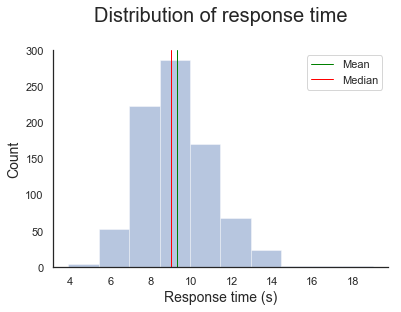

In [86]:
ax = sns.distplot(df_lifetime['response_time'], hist=True, kde=False, bins=10)
sns.set_context('poster')
sns.set(style='white')
sns.despine(bottom=False)
ax.set_title('Distribution of response time\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Response time (s)', size = 14)
ax.axvline(df_lifetime['response_time'].mean(), color = 'green', linewidth = 1)
ax.axvline(df_lifetime['response_time'].median(), color = 'red', linewidth = 1)
ax.legend(['Mean', 'Median'])
plt.show()

In [87]:
df_lifetime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 002be0ffdc997bd5c50703158b7c2491 to ffff51a71f2f185ec5e97d59dbcd7a78
Data columns (total 8 columns):
day_of_year                              837 non-null int64
driver_onboard_day                       837 non-null int64
days_worked                              837 non-null int64
time_worked                              837 non-null float64
Total_Fare_Collected_Lifetime            837 non-null float64
Total_Fare_Collected_Lifetime_PerHour    837 non-null float64
no_rides                                 837 non-null int64
response_time                            837 non-null float64
dtypes: float64(4), int64(4)
memory usage: 58.9+ KB


# Churned lifetime based on $\mu$ - $\sigma$

To calculate the number of drivers who have churned, the driver lifetime distribution has been assumed to be 
1. The driver lifetime distribution has been assumed to be a normal distribution
2. A threshold of (Mean - Standard deviation) has been assumed to find the number of drivers who have churned. Drivers lying to the left of this line have been assumed to have churned

In [88]:
df_lifetime.days_worked.std()

21.708488638330284

In [108]:
df_lifetime.days_worked.mean()

55.04778972520908

In [89]:
df_churned_lifetime = df_lifetime[df_lifetime.days_worked < (df_lifetime.days_worked.mean() - df_lifetime.days_worked.std())]

In [90]:
df_nonchurned_lifetime = df_lifetime[df_lifetime.days_worked >= (df_lifetime.days_worked.mean() - df_lifetime.days_worked.std())]

In [91]:
df_churned_lifetime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0213f8b59219e32142711992ca4ec01f to fed19d671569afe8a2f9fa0953dd25ca
Data columns (total 8 columns):
day_of_year                              152 non-null int64
driver_onboard_day                       152 non-null int64
days_worked                              152 non-null int64
time_worked                              152 non-null float64
Total_Fare_Collected_Lifetime            152 non-null float64
Total_Fare_Collected_Lifetime_PerHour    152 non-null float64
no_rides                                 152 non-null int64
response_time                            152 non-null float64
dtypes: float64(4), int64(4)
memory usage: 10.7+ KB


This shows that 152 drivers have churned.

In [109]:
df_nonchurned_lifetime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 002be0ffdc997bd5c50703158b7c2491 to ffff51a71f2f185ec5e97d59dbcd7a78
Data columns (total 8 columns):
day_of_year                              685 non-null int64
driver_onboard_day                       685 non-null int64
days_worked                              685 non-null int64
time_worked                              685 non-null float64
Total_Fare_Collected_Lifetime            685 non-null float64
Total_Fare_Collected_Lifetime_PerHour    685 non-null float64
no_rides                                 685 non-null int64
response_time                            685 non-null float64
dtypes: float64(4), int64(4)
memory usage: 48.2+ KB


# Churned lifetime based on percentage of number of days active- Relative value

In [110]:
df_merged.day_of_year.max()

178

In [111]:
churned_lifetime2 = df_churned_lifetime[df_churned_lifetime.days_worked / (df_merged.day_of_year.max() - df_churned_lifetime.driver_onboard_day) < 0.3]

In [112]:
churned_lifetime2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0430df9a3eb327122c57ee3a64765000 to fed19d671569afe8a2f9fa0953dd25ca
Data columns (total 8 columns):
day_of_year                              69 non-null int64
driver_onboard_day                       69 non-null int64
days_worked                              69 non-null int64
time_worked                              69 non-null float64
Total_Fare_Collected_Lifetime            69 non-null float64
Total_Fare_Collected_Lifetime_PerHour    69 non-null float64
no_rides                                 69 non-null int64
response_time                            69 non-null float64
dtypes: float64(4), int64(4)
memory usage: 4.9+ KB


In [113]:
non_churned_lifetime2 = df_lifetime[df_lifetime.days_worked >= (df_lifetime.days_worked.mean() - df_lifetime.days_worked.std())]

In [114]:
churned_lifetime2= df_churned_lifetime

In [115]:
non_churned_lifetime2.head(2)

,day_of_year,driver_onboard_day,days_worked,time_worked,Total_Fare_Collected_Lifetime,Total_Fare_Collected_Lifetime_PerHour,no_rides,response_time
driver_id,,,,,,,,
002be0ffdc997bd5c50703158b7c2491,175,89,86,58.852222,3245.244788,55.142264,273,6.739927
007f0389f9c7b03ef97098422f902e62,174,89,85,5.693611,308.994852,54.270453,31,11.838710


In [116]:
churned_lifetime_merged = pd.merge(df_merged, churned_lifetime2, on='driver_id', how='inner')

In [117]:
churned_lifetime_merged.head(5)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,...,driver_onboard_day_x,Fare_Collected,day_of_year_y,driver_onboard_day_y,days_worked,time_worked,Total_Fare_Collected_Lifetime,Total_Fare_Collected_Lifetime_PerHour,no_rides,response_time
0,0213f8b59219e32142711992ca4ec01f,0177d0cf5a6638fa17275f3a3abf016a,6974,787,0,2016-04-27 02:27:33,2016-04-27 02:30:11,2016-04-27 02:43:19,2016-04-27 02:30:12,2016-04-27 02:27:28,...,98,11.619130,128,98,30,49.871111,2884.485519,57.838806,239,9.016736
1,0213f8b59219e32142711992ca4ec01f,0237bf3a1214fd834268a94ddb926998,5052,1056,25,2016-05-03 21:55:03,2016-05-03 21:57:29,2016-05-03 22:15:08,2016-05-03 21:57:32,2016-05-03 21:54:57,...,98,13.102561,128,98,30,49.871111,2884.485519,57.838806,239,9.016736
2,0213f8b59219e32142711992ca4ec01f,03f3f0ceb76ec06795a167a94c072cbc,4194,655,0,2016-05-07 19:18:14,2016-05-07 19:20:41,2016-05-07 19:31:33,2016-05-07 19:20:38,2016-05-07 19:18:05,...,98,9.148606,128,98,30,49.871111,2884.485519,57.838806,239,9.016736
3,0213f8b59219e32142711992ca4ec01f,06194634095f99ef7e4df8a8d7414e84,1152,250,0,2016-05-03 02:50:34,2016-05-03 02:54:17,2016-05-03 02:58:27,2016-05-03 02:54:17,2016-05-03 02:50:30,...,98,5.489861,128,98,30,49.871111,2884.485519,57.838806,239,9.016736
4,0213f8b59219e32142711992ca4ec01f,069958cfd773db5d40193b330d50cc0b,20308,1504,50,2016-05-03 17:13:32,2016-05-03 17:17:25,2016-05-03 17:42:33,2016-05-03 17:17:29,2016-05-03 17:13:27,...,98,33.789450,128,98,30,49.871111,2884.485519,57.838806,239,9.016736


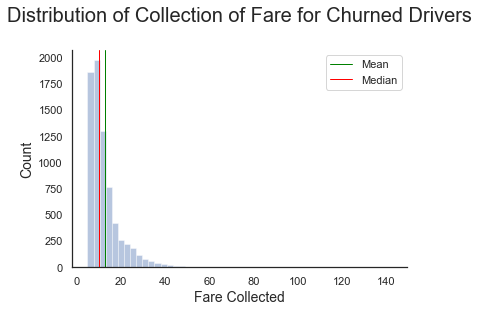

In [118]:
ax = sns.distplot(churned_lifetime_merged['Fare_Collected'], hist=True, kde=False, bins=50)
sns.set_context('poster')
sns.set(style='white')
sns.despine(bottom=False)
ax.set_title('Distribution of Collection of Fare for Churned Drivers\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Fare Collected', size = 14)
ax.axvline(churned_lifetime_merged['Fare_Collected'].mean(), color = 'green', linewidth = 1)
ax.axvline(churned_lifetime_merged['Fare_Collected'].median(), color = 'red', linewidth = 1)
ax.legend(['Mean', 'Median'])
plt.show()

In [119]:
churned_lifetime_merged.Fare_Collected.describe()

count    7414.000000
mean       12.699918
std         7.980857
min         5.000000
25%         7.737290
50%        10.260280
75%        14.622270
max       142.408529
Name: Fare_Collected, dtype: float64

In [120]:
nonchurned_lifetime_merged = pd.merge(df_merged, non_churned_lifetime2, on='driver_id', how='inner')

In [121]:
nonchurned_lifetime_merged.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,...,driver_onboard_day_x,Fare_Collected,day_of_year_y,driver_onboard_day_y,days_worked,time_worked,Total_Fare_Collected_Lifetime,Total_Fare_Collected_Lifetime_PerHour,no_rides,response_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,...,89,7.489651,175,89,86,58.852222,3245.244788,55.142264,273,6.739927
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,...,89,9.118746,175,89,86,58.852222,3245.244788,55.142264,273,6.739927
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,...,89,8.192578,175,89,86,58.852222,3245.244788,55.142264,273,6.739927
3,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30,...,89,15.666311,175,89,86,58.852222,3245.244788,55.142264,273,6.739927
4,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100,2016-06-21 08:29:24,2016-06-21 08:35:33,2016-06-21 08:50:53,2016-06-21 08:35:36,2016-06-21 08:29:17,...,89,17.380349,175,89,86,58.852222,3245.244788,55.142264,273,6.739927


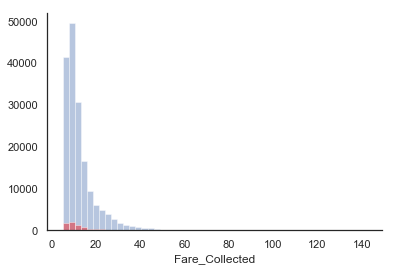

In [122]:
sns.distplot(nonchurned_lifetime_merged['Fare_Collected'], hist=True, kde=False, bins=50)
sns.distplot(churned_lifetime_merged['Fare_Collected'] , color="red", hist=True, kde=False, bins=50)
#sns.distplot( df["sepal_width"] , color="red", label="Sepal Width")
sns.set_context('poster')
sns.set(style='white')
sns.despine(bottom=False)
ax.set_title('Distribution of Collection of Fare for Non-Churned Drivers\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Fare Collected', size = 14)
ax.axvline(nonchurned_lifetime_merged['Fare_Collected'].mean(), color = 'green', linewidth = 1)
ax.axvline(nonchurned_lifetime_merged['Fare_Collected'].median(), color = 'red', linewidth = 1)
ax.legend(['Mean', 'Median'])
plt.show()

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


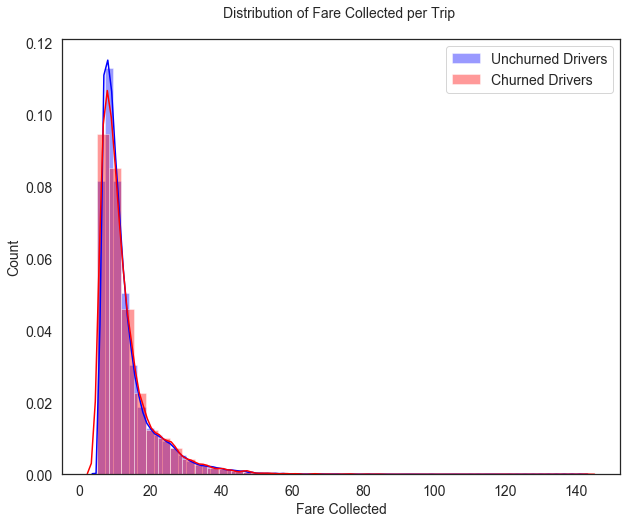

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.distplot( nonchurned_lifetime_merged['Fare_Collected'], color="blue", hist= True, bins=60, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['Fare_Collected'] , color="red", hist=True, bins=40, label= 'Churned Drivers')
ax.set_title('Distribution of Fare Collected per Trip \n', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Fare Collected', size = 14)
plt.legend(loc=1, prop={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


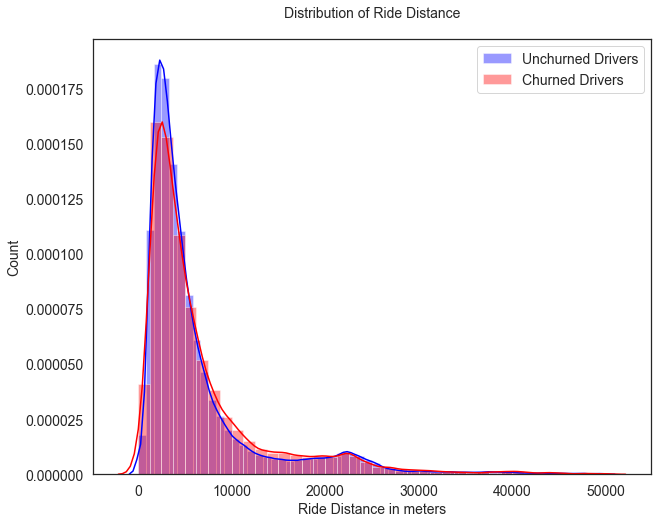

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.distplot( nonchurned_lifetime_merged['ride_distance'], color="blue", hist=True, bins=60, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['ride_distance'] , color="red", hist=True, bins=40, label= 'Churned Drivers')
ax.set_title('Distribution of Ride Distance\n', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Ride Distance in meters', size = 14)
plt.legend(loc=1, prop={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


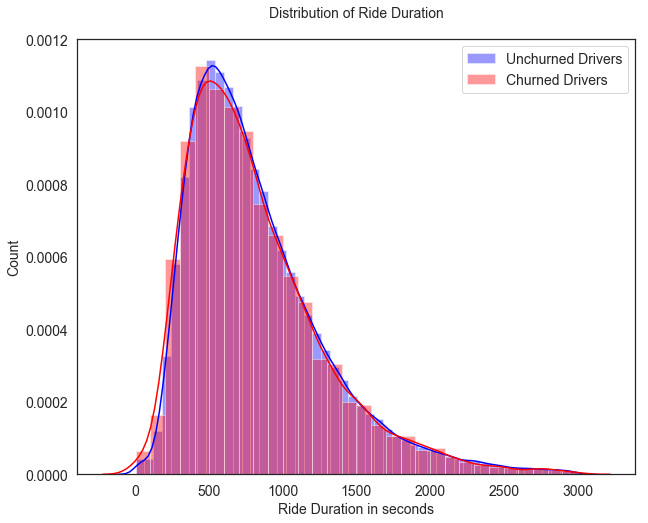

In [134]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.distplot( nonchurned_lifetime_merged['ride_duration'], color="blue", hist=True, bins=50, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['ride_duration'] , color="red", hist=True, bins=30, label= 'Churned Drivers')
ax.set_title('Distribution of Ride Duration\n', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Ride Duration in seconds', size = 14)
plt.legend(loc=1, prop={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


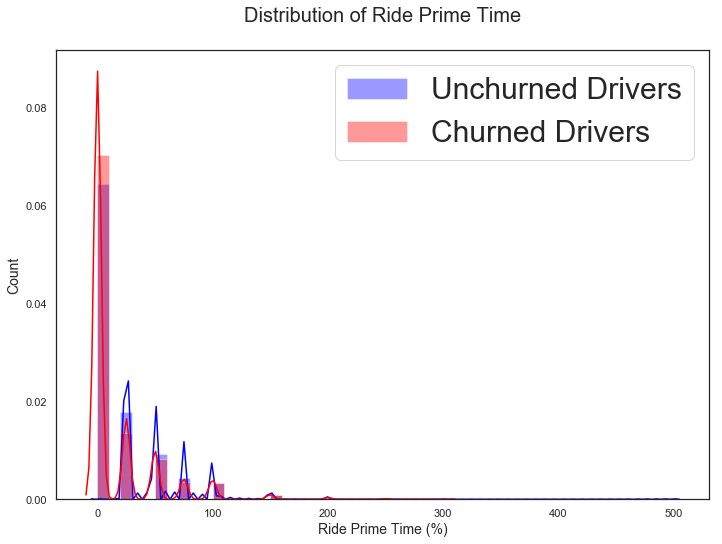

In [135]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( nonchurned_lifetime_merged['ride_prime_time'], color="blue", hist=True, bins=50, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['ride_prime_time'] , color="red", hist=True, bins=30, label= 'Churned Drivers')
ax.set_title('Distribution of Ride Prime Time\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Ride Prime Time (%)', size = 14)
plt.legend(loc=1, prop={'size': 30})

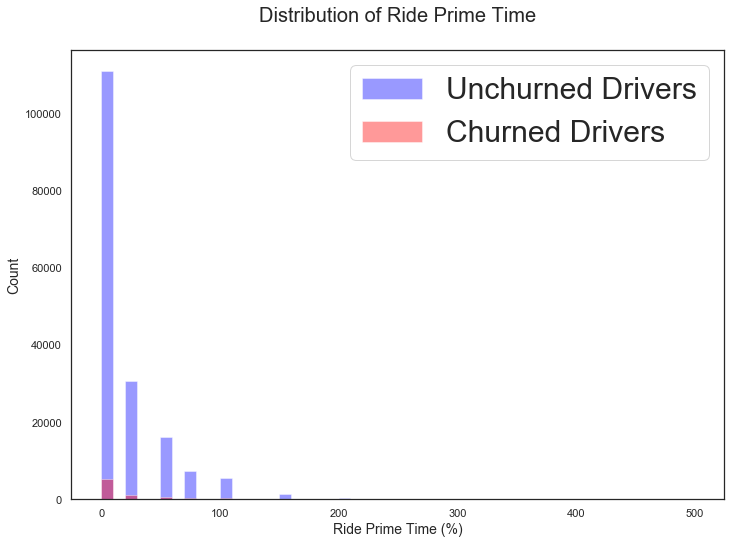

In [136]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( nonchurned_lifetime_merged['ride_prime_time'], color="blue", hist=True, bins=50, kde = False, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['ride_prime_time'] , color="red", hist=True, bins=30, kde = False, label= 'Churned Drivers')
ax.set_title('Distribution of Ride Prime Time\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Ride Prime Time (%)', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


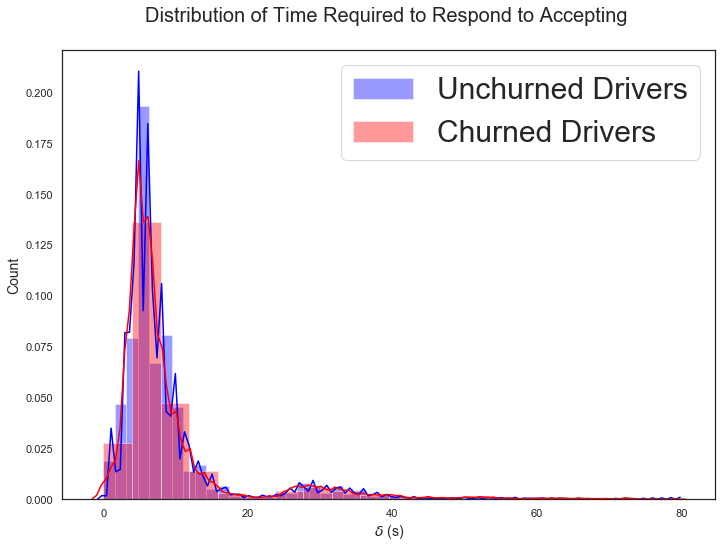

In [137]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( nonchurned_lifetime_merged['accepted_time'], color="blue", hist=True, bins=50, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['accepted_time'] , color="red", hist=True, bins=20, label= 'Churned Drivers')
ax.set_title('Distribution of Time Required to Respond to Accepting \n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('$\delta$ (s)', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


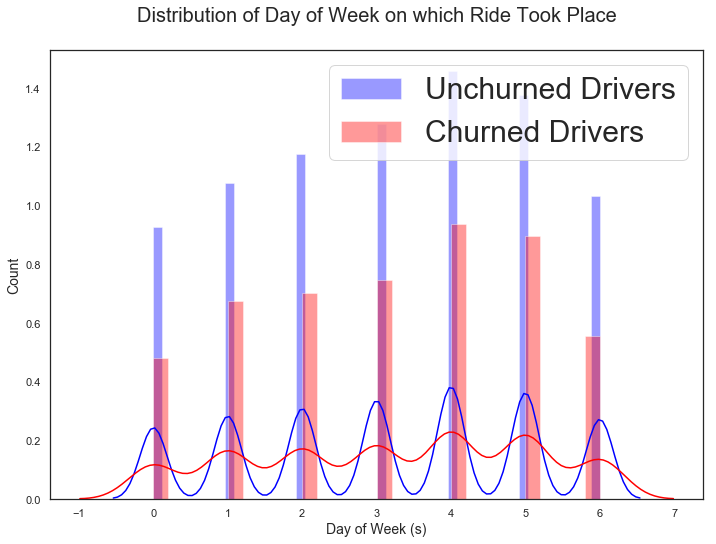

In [138]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( nonchurned_lifetime_merged['day_of_week'], color="blue", hist=True, bins=50, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['day_of_week'] , color="red", hist=True, bins=30, label= 'Churned Drivers')
ax.set_title('Distribution of Day of Week on which Ride Took Place\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Day of Week (s)', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


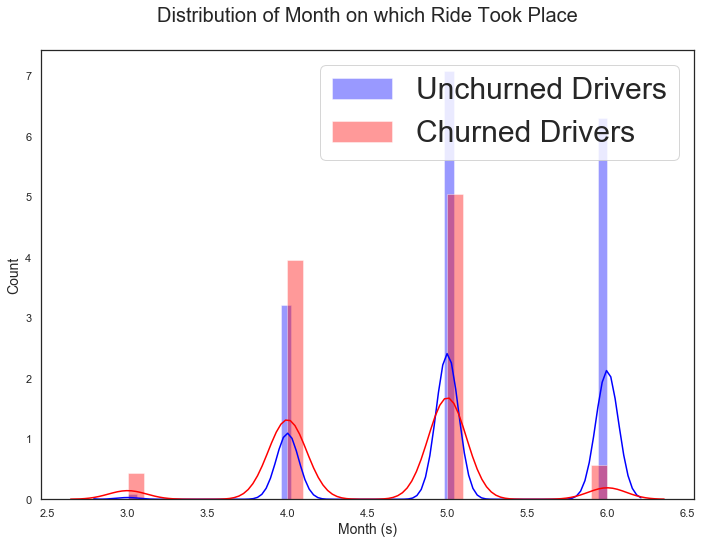

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( nonchurned_lifetime_merged['month'], color="blue", hist=True, bins=50, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['month'] , color="red", hist=True, bins=30, label= 'Churned Drivers')
ax.set_title('Distribution of Month on which Ride Took Place\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Month (s)', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


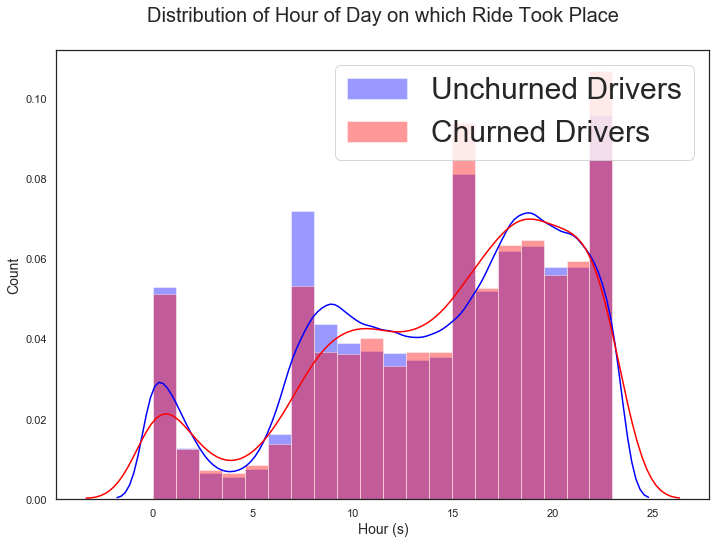

In [140]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( nonchurned_lifetime_merged['hour_of_day'], color="blue", hist=True, bins=20, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['hour_of_day'] , color="red", hist=True, bins=20, label= 'Churned Drivers')
ax.set_title('Distribution of Hour of Day on which Ride Took Place\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Hour (s)', size = 14)
plt.legend(loc=1, prop={'size': 30})

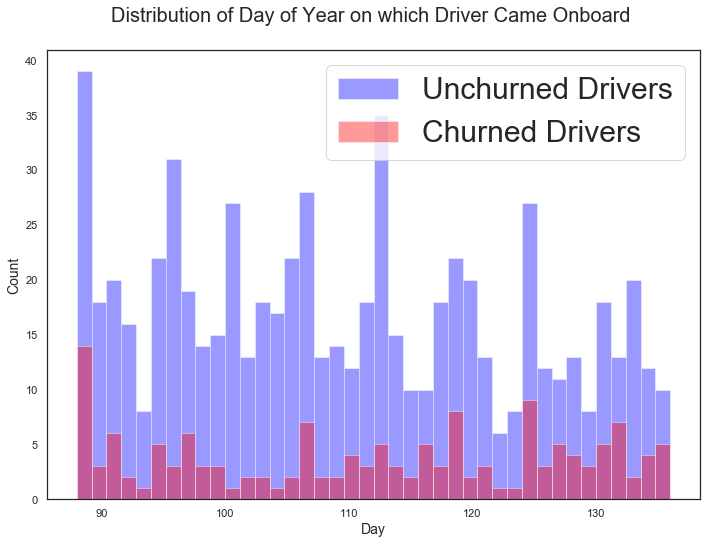

In [141]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( non_churned_lifetime2['driver_onboard_day'], color="blue", hist=True, bins=40, kde = False, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['driver_onboard_day'] , color="red", hist=True, bins=40, kde = False, label= 'Churned Drivers')
ax.set_title('Distribution of Day of Year on which Driver Came Onboard \n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Day', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


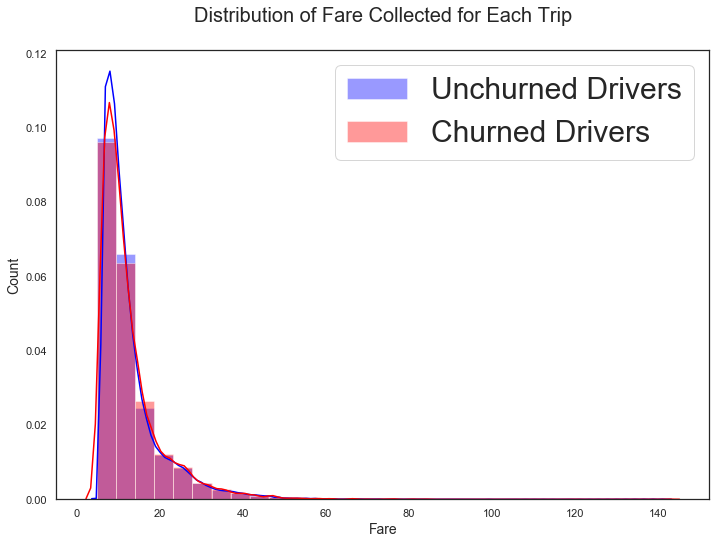

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( nonchurned_lifetime_merged['Fare_Collected'], color="blue", hist=True, bins=30, label="Unchurned Drivers")
sns.distplot( churned_lifetime_merged['Fare_Collected'] , color="red", hist=True, bins=30, label= 'Churned Drivers')
ax.set_title('Distribution of Fare Collected for Each Trip\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Fare', size = 14)
plt.legend(loc=1, prop={'size': 30})

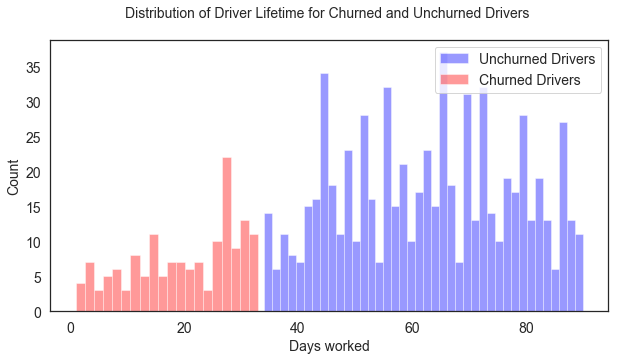

In [143]:
fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
fig.set_size_inches(10, 5)
sns.distplot( df_nonchurned_lifetime['days_worked'], color="blue", hist=True, bins=40, kde = False, label="Unchurned Drivers")
sns.distplot( df_churned_lifetime['days_worked'] , color="red", hist=True, bins=20, kde = False, label= 'Churned Drivers')
ax.set_title('Distribution of Driver Lifetime for Churned and Unchurned Drivers \n', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Days worked', size = 14)
plt.legend(loc=1, prop={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)

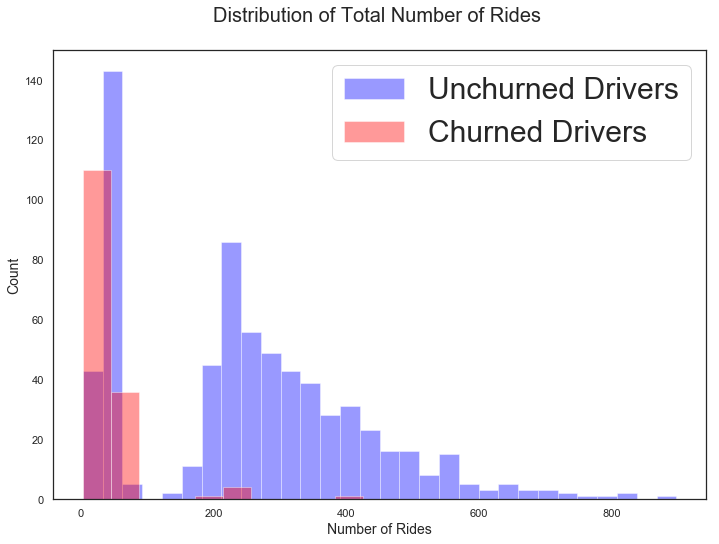

In [144]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( non_churned_lifetime2['no_rides'], color="blue", hist=True, bins=30, kde = False, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['no_rides'] , color="red", hist=True, bins = 10, kde = False, label= 'Churned Drivers')
ax.set_title('Distribution of Total Number of Rides \n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Number of Rides', size = 14)
plt.legend(loc=1, prop={'size': 30})

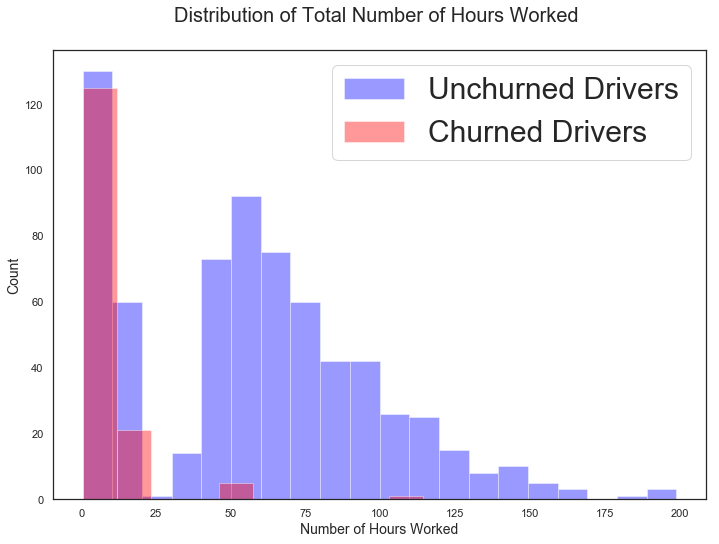

In [145]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( non_churned_lifetime2['time_worked'], color="blue", hist=True, bins=20, kde = False, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['time_worked'] , color="red", hist=True, bins=10, kde= False, label= 'Churned Drivers')
ax.set_title('Distribution of Total Number of Hours Worked \n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Number of Hours Worked', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


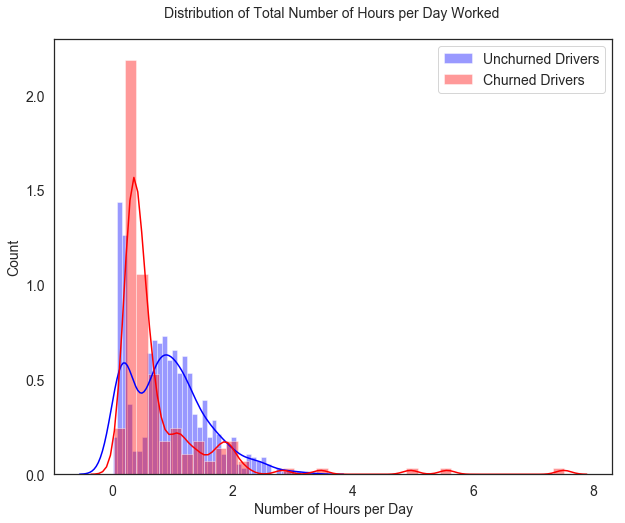

In [146]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.distplot( non_churned_lifetime2['time_worked']/non_churned_lifetime2['days_worked'], color="blue", hist=True, bins=40, kde = True, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['time_worked']/churned_lifetime2['days_worked'] , color="red", hist=True, bins=40, kde= True, label= 'Churned Drivers')
ax.set_title('Distribution of Total Number of Hours per Day Worked \n', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Number of Hours per Day', size = 14)
plt.legend(loc=1, prop={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)

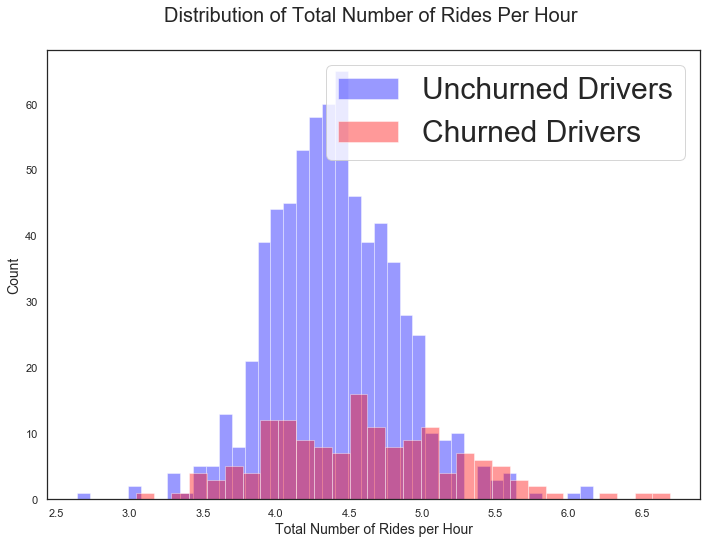

In [147]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( non_churned_lifetime2['no_rides']/non_churned_lifetime2['time_worked'], color="blue", hist=True, bins=40, kde = False, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['no_rides'] / churned_lifetime2['time_worked'] , color="red", hist=True, bins=30, kde = False, label= 'Churned Drivers')
ax.set_title('Distribution of Total Number of Rides Per Hour \n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Total Number of Rides per Hour', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


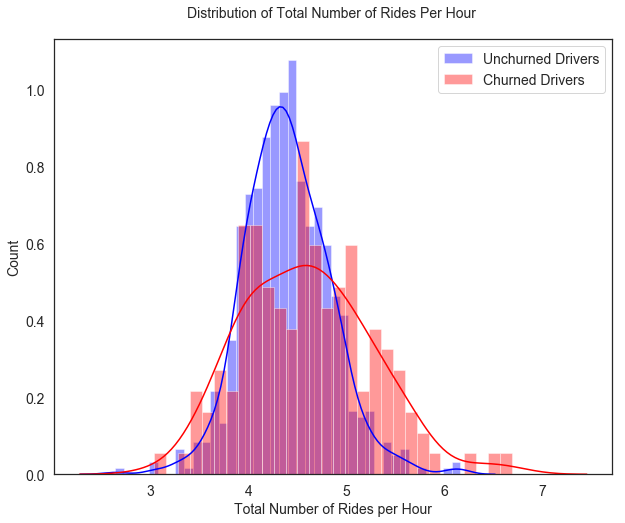

In [148]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.distplot( non_churned_lifetime2['no_rides']/non_churned_lifetime2['time_worked'], color="blue", hist=True, bins=40, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['no_rides'] / churned_lifetime2['time_worked'] , color="red", hist=True, bins=30, label= 'Churned Drivers')
ax.set_title('Distribution of Total Number of Rides Per Hour \n', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Total Number of Rides per Hour', size = 14)
plt.legend(loc=1, prop={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)

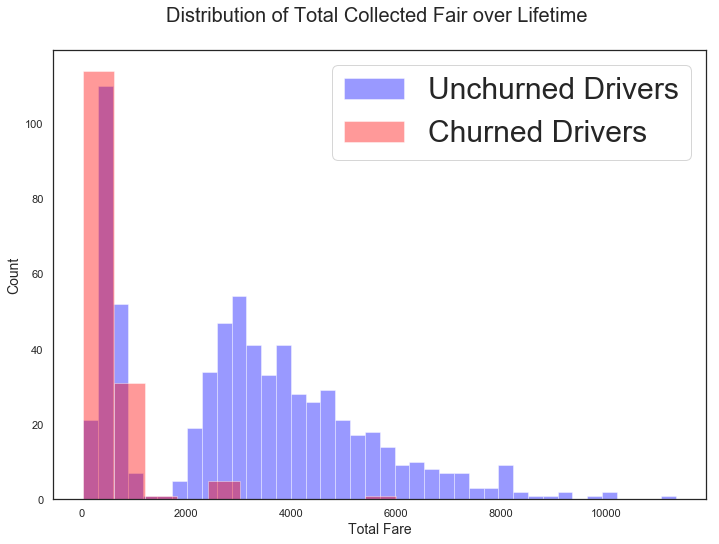

In [149]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( non_churned_lifetime2['Total_Fare_Collected_Lifetime'], color="blue", hist=True, bins=40, kde = False, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['Total_Fare_Collected_Lifetime'] , color="red", hist=True, bins=10, kde = False, label= 'Churned Drivers')
ax.set_title('Distribution of Total Collected Fair over Lifetime \n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Total Fare', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


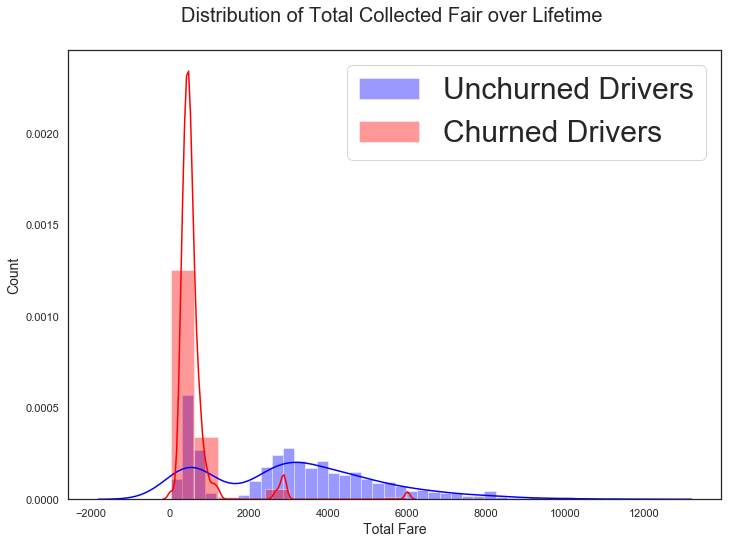

In [150]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( non_churned_lifetime2['Total_Fare_Collected_Lifetime'], color="blue", hist=True, bins=40, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['Total_Fare_Collected_Lifetime'] , color="red", hist=True, bins=10, label= 'Churned Drivers')
ax.set_title('Distribution of Total Collected Fair over Lifetime \n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Total Fare', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


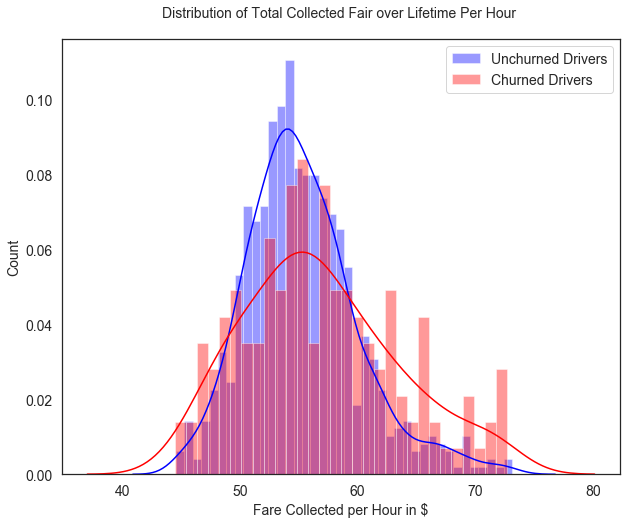

In [151]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.distplot( non_churned_lifetime2['Total_Fare_Collected_Lifetime_PerHour'], color="blue", hist=True, bins=40, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['Total_Fare_Collected_Lifetime_PerHour'] , color="red", hist=True, bins=30, label= 'Churned Drivers')
ax.set_title('Distribution of Total Collected Fair over Lifetime Per Hour \n', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Fare Collected per Hour in $', size = 14)
plt.legend(loc=1, prop={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)

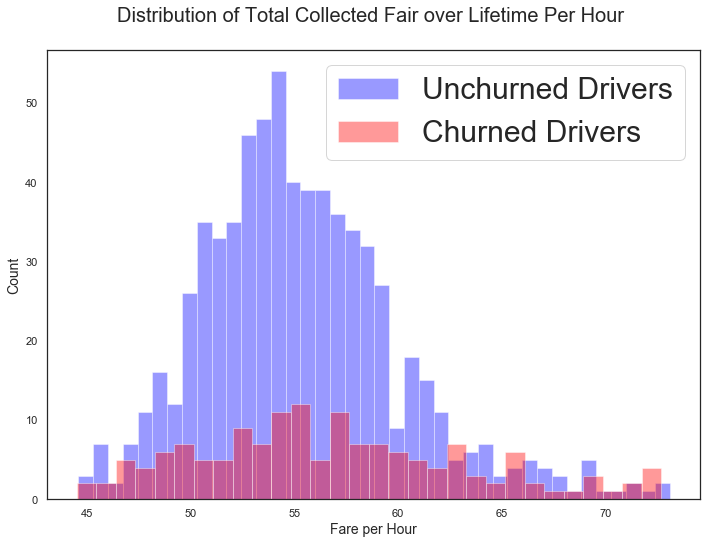

In [152]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot( non_churned_lifetime2['Total_Fare_Collected_Lifetime_PerHour'], color="blue", hist=True, bins=40, kde = False, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['Total_Fare_Collected_Lifetime_PerHour'] , color="red", hist=True, bins=30, kde = False, label= 'Churned Drivers')
ax.set_title('Distribution of Total Collected Fair over Lifetime Per Hour \n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Fare per Hour', size = 14)
plt.legend(loc=1, prop={'size': 30})

C:\Users\tejas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


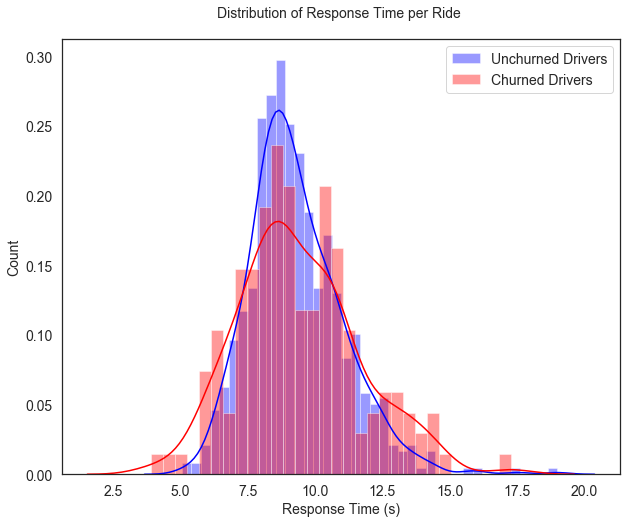

In [153]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.distplot( non_churned_lifetime2['response_time'], color="blue", hist=True, bins=40, label="Unchurned Drivers")
sns.distplot( churned_lifetime2['response_time'] , color="red", hist=True, bins=30, label= 'Churned Drivers')
ax.set_title('Distribution of Response Time per Ride \n', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Response Time (s)', size = 14)
plt.legend(loc=1, prop={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)

# Conclusions
1) Average driver lifetime value is close to 55 days <br>
2) Following factors have been identified which lead to driver churn: <br> 
&nbsp;&nbsp;&nbsp;&nbsp;    a) Number of hours worked per day <br>
&nbsp;&nbsp;&nbsp;&nbsp;    b) Total number of rides per hour <br> 
&nbsp;&nbsp;&nbsp;&nbsp;    c) Fare collected per hour <br>
&nbsp;&nbsp;&nbsp;&nbsp;    d) Response time per ride 